# Bernoulli Bandits
We will walk through an example using **mabby** to run a classic "Bernoulli bandits" simulation.

In [1]:
from mabby import BernoulliArm, Bandit, Metric, Simulation
from mabby.strategies import BetaTSStrategy, EpsilonGreedyStrategy, UCB1Strategy

### Configuring bandit arms

First, to set up our simulation, let us start by configuring our multi-armed bandit. We want to simulate a $3$-armed bandit where the rewards of each arm follow Bernoulli distributions with `p` of 0.5, 0.6, and 0.7 respectively.

In [2]:
ps = [0.5, 0.6, 0.7]

We create a `BernoulliArm` for each arm, then create a `Bandit` using the list of arms.

In [3]:
arms = [BernoulliArm(p) for p in ps]
bandit = Bandit(arms=arms)
print(bandit)

[Bernoulli(p=0.5), Bernoulli(p=0.6), Bernoulli(p=0.7)]


Because all our arms are of the same type (i.e., their rewards follow the same type of distribution), we can also use the equivalent shorthand below to create the bandit.

In [4]:
bandit = BernoulliArm.bandit(p=ps)
print(bandit)

[Bernoulli(p=0.5), Bernoulli(p=0.6), Bernoulli(p=0.7)]


### Configuring bandit strategies

Next, we need to configure the strategies we want to simulate on the bandit we just created. We will compare between three strategies:
- epsilon-greedy algorithm (`EpsilonGreedyStrategy`)
- upper confidence bound (UCB1) algorithm (`UCB1Strategy`)
- Thompson sampling with Beta priors (`BetaTSStrategy`)

We create each of the strategies with the appropriate hyperparameters.

In [5]:
strategy_1 = EpsilonGreedyStrategy(eps=0.2)
strategy_2 = UCB1Strategy(alpha=0.5)
strategy_3 = BetaTSStrategy(general=True)

strategies = [strategy_1, strategy_2, strategy_3]
print(strategies)

[eps-greedy (eps=0.2), ucb1 (alpha=0.5), generalized beta ts]


### Running a simulation
Now, we can set up a simulation and run it. We first create a `Simulation` with our bandit and strategies.

In [6]:
simulation = Simulation(
    bandit=bandit, strategies=strategies, names=["eps-greedy", "ucb1", "thompson"]
)

Then, we run our simulation for 100 trials of 300 steps each. We also specify that we want to collect statistics on the optimality (`Metric.OPTIMALITY`) and cumulative regret (`Metric.CUM_REGRET`) for each of the strategies. Running the simulation outputs a `SimulationStats` object holding the statistics we requested.

In [7]:
metrics = [Metric.OPTIMALITY, Metric.CUM_REGRET]
stats = simulation.run(trials=100, steps=300, metrics=metrics)

### Visualizing simulation statistics
After running our simulation, we can visualize the statistics we collected by calling various plotting methods.

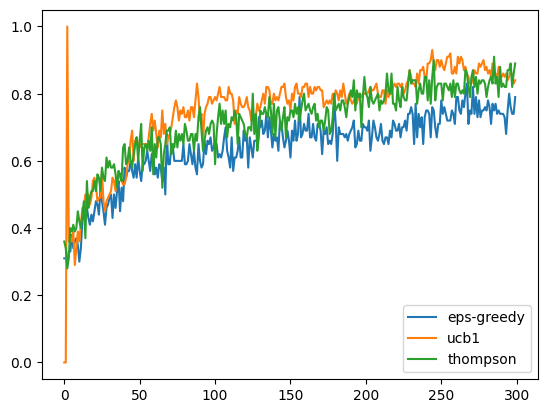

In [8]:
stats.plot_optimality()

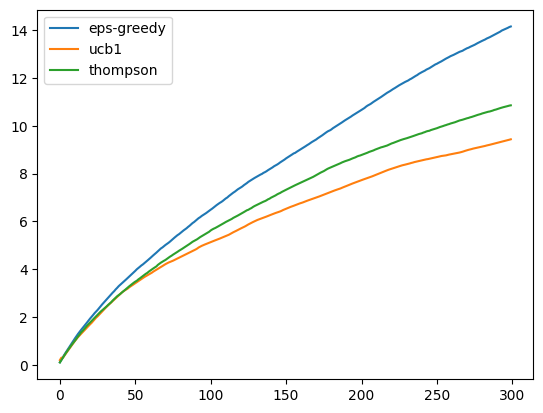

In [9]:
stats.plot_regret(cumulative=True)